## Importación modulos y datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory=False) 

## Exploración datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lote       1212 non-null   int64  
 1   Individuo  1212 non-null   int64  
 2   AE         1212 non-null   float64
 3   LE         1212 non-null   float64
 4   AT         1212 non-null   float64
 5   LT         1212 non-null   float64
 6   AA         1212 non-null   float64
 7   LA         1212 non-null   float64
 8   NV         1212 non-null   float64
 9   Morfotipo  1212 non-null   object 
 10  Labio      1212 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 104.3+ KB


In [4]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio
0,96,5,6.18,1.83,13.57,10.00,8.10,6.04,5.15,LU,1
1,96,5,6.16,1.83,13.66,10.08,8.16,6.13,5.12,LU,1
2,96,5,6.14,1.81,13.61,10.01,8.20,6.14,5.10,LU,1
3,96,5,6.18,1.82,13.85,10.07,8.16,6.14,5.09,LU,1
4,96,6,6.58,2.16,11.69,9.10,6.56,4.92,5.49,LU,0


In [5]:
data["Morfotipo"].astype('category')

0       LU
1       LU
2       LU
3       LU
4       LU
        ..
1207    LU
1208    LB
1209    LB
1210    LB
1211    LB
Name: Morfotipo, Length: 1212, dtype: category
Categories (3, object): ['DU', 'LB', 'LU']

In [6]:
data.Morfotipo.value_counts()

LU    1040
LB     164
DU       8
Name: Morfotipo, dtype: int64

In [7]:
data.iloc[:,2:-1].describe()

,AE,LE,AT,LT,AA,LA,NV
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.00000,1212.000000
mean,6.121980,1.753333,13.009167,9.633936,7.578465,6.06250,5.119604
std,0.976585,0.361939,1.931606,1.397661,1.215578,0.80903,0.300297
min,3.180000,0.690000,7.920000,6.140000,4.710000,4.21000,4.020000
25%,5.400000,1.490000,11.537500,8.677500,6.680000,5.47000,4.920000
50%,6.110000,1.760000,12.840000,9.545000,7.480000,5.97000,5.160000
75%,6.820000,2.010000,14.300000,10.670000,8.400000,6.58000,5.330000
max,9.110000,3.160000,19.200000,14.540000,12.010000,8.86000,5.930000


In [8]:
data.loc[np.logical_or(data["NV"] > 4.75, data["Labio"] == 1)]

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio
0,96,5,6.18,1.83,13.57,10.00,8.10,6.04,5.15,LU,1
1,96,5,6.16,1.83,13.66,10.08,8.16,6.13,5.12,LU,1
2,96,5,6.14,1.81,13.61,10.01,8.20,6.14,5.10,LU,1
3,96,5,6.18,1.82,13.85,10.07,8.16,6.14,5.09,LU,1
4,96,6,6.58,2.16,11.69,9.10,6.56,4.92,5.49,LU,0
...,...,...,...,...,...,...,...,...,...,...,...
1207,404,3,7.08,1.54,16.36,11.25,9.41,7.53,5.23,LU,1
1208,404,4,6.58,1.79,14.20,10.62,8.32,6.64,5.19,LB,1
1209,404,4,6.53,1.81,14.24,10.80,8.23,6.67,5.18,LB,1
1210,404,4,6.60,1.83,14.25,10.77,8.23,6.77,5.18,LB,1


In [25]:
#adultos
#mask_adulto = data.loc[np.logical_or(data["AT"] > 0.8, data["Labio"] == 1)]
data["Adulto"] = np.where(np.logical_or(data["AT"] > 0.8, data["Labio"] == 1),True,False)

In [26]:
data.Adulto.value_counts()
#son todos adultos????

True    1212
Name: Adulto, dtype: int64

### Relación entre variables

<AxesSubplot:>

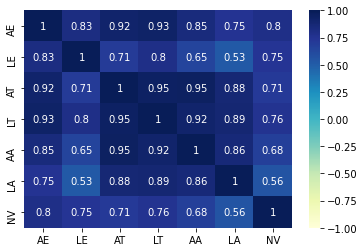

In [20]:
sns.heatmap(data.iloc[:,2:-2].corr(), vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

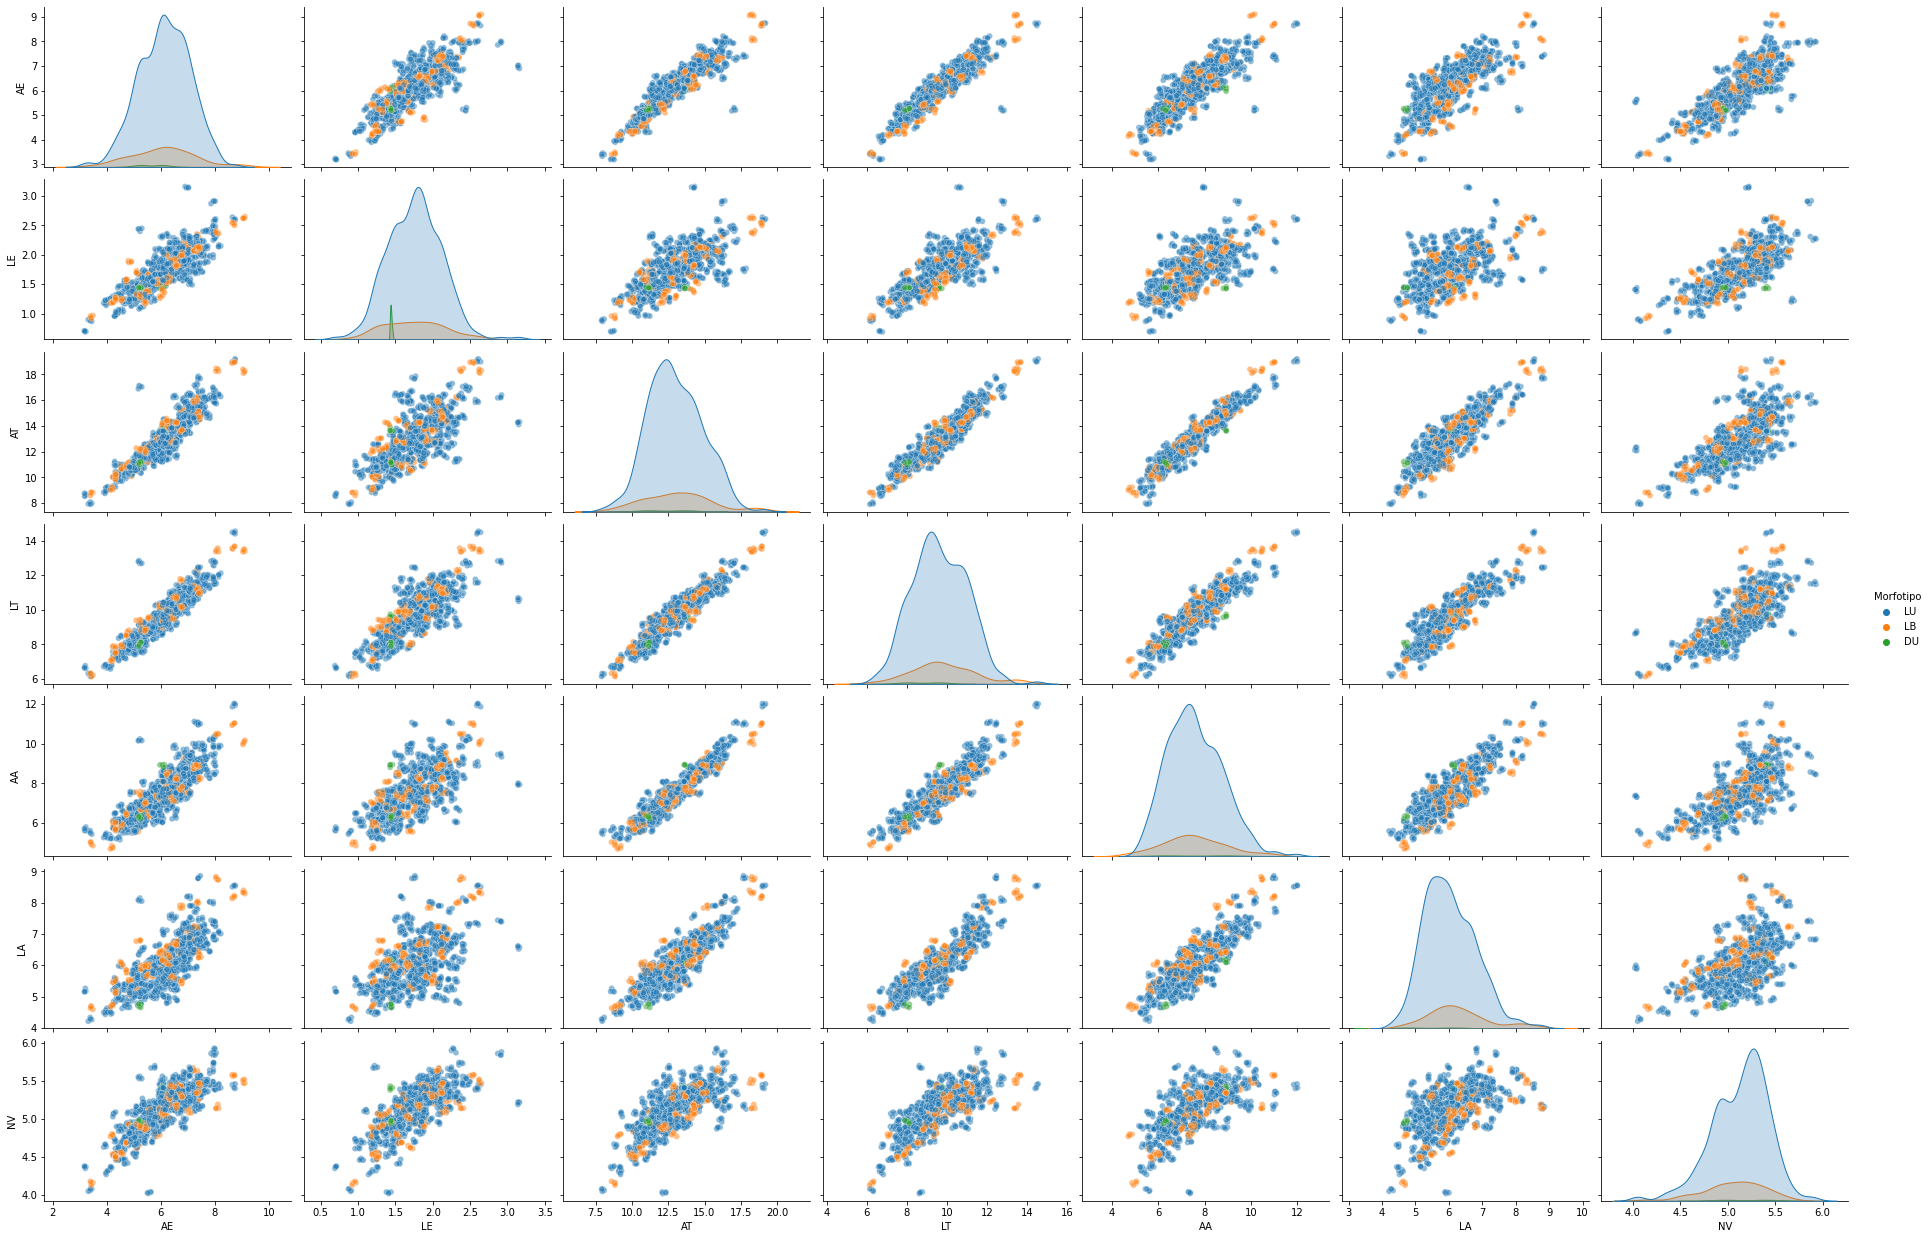

In [21]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

In [66]:
def distribution_plotter(data, label, bins="auto"):    
    plt.figure(figsize = (10,5))
    sns.set_style("white")    
    dist = sns.histplot(data, bins=bins, stat = "count", kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = 500)    
    dist.set_title('Distribucion ', fontsize = 16)
    plt.xticks(rotation=45, ha='right')

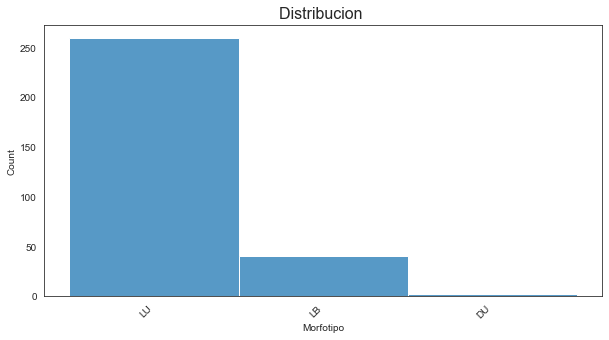

In [67]:
distribution_plotter(data["Morfotipo"],data["Morfotipo"].unique())

### Recuento por Etiqueta

In [68]:
print(pd.value_counts(data["Morfotipo"], sort = True, normalize=True))

LU    0.858086
LB    0.135314
DU    0.006601
Name: Morfotipo, dtype: float64


In [22]:
print(pd.value_counts(data["Adulto"], sort = True, normalize=True))

1    1.0
Name: Adulto, dtype: float64


### Distribución de las observaciones

array([[<AxesSubplot:title={'center':'AE'}>,
        <AxesSubplot:title={'center':'LE'}>,
        <AxesSubplot:title={'center':'AT'}>],
       [<AxesSubplot:title={'center':'LT'}>,
        <AxesSubplot:title={'center':'AA'}>,
        <AxesSubplot:title={'center':'LA'}>],
       [<AxesSubplot:title={'center':'NV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

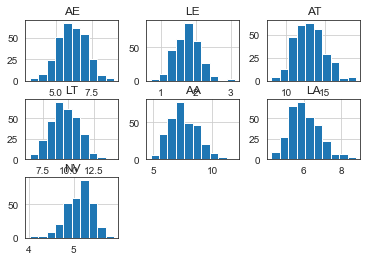

In [69]:
columns = data[["AE","LE","AT","LT","AA","LA","NV"]]
columns.hist()

## Creamos columnas de relación entre variables

In [70]:
data["Ratio_LE_AE"] = data["LE"]/data["AE"]
data["Ratio_LT_AT"] = data["LT"]/data["AT"]
data["Ratio_LA_AA"] = data["LA"]/data["AA"]
data["Ratio_LE_LT"] = data["LE"]/data["LT"]
data["Ratio_AE_AT"] = data["AE"]/data["AT"]
data["Ratio_LA_LT"] = data["LA"]/data["LT"]
data["Ratio_AA_AT"] = data["AA"]/data["AT"]
data["Ratio_LE_LA"] = data["LE"]/data["LA"]
data["Ratio_AE_AA"] = data["AE"]/data["AA"]

#aux copy: 'Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'

In [71]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Labio,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,5,6.14,1.80,13.72,10.00,8.13,6.08,5.12,LU,1,0.293160,0.728863,0.747847,0.180000,0.447522,0.608000,0.592566,0.296053,0.755228
1,96,6,6.54,2.18,11.66,9.21,6.66,4.93,5.47,LU,0,0.333333,0.789880,0.740240,0.236699,0.560892,0.535288,0.571184,0.442191,0.981982
2,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU,0,0.303468,0.762985,0.735115,0.201342,0.506218,0.580058,0.602048,0.347107,0.840826
3,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU,0,0.293846,0.761791,0.916272,0.200420,0.519584,0.608604,0.505995,0.329310,1.026856
4,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU,1,0.286184,0.729921,0.754941,0.187702,0.478740,0.618123,0.597638,0.303665,0.801054


### Nueva visualización

<AxesSubplot:>

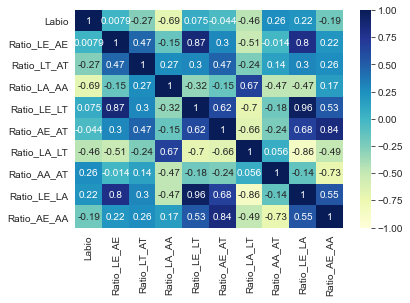

In [72]:
sns.heatmap(data.corr().iloc[9:19,9:19], vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

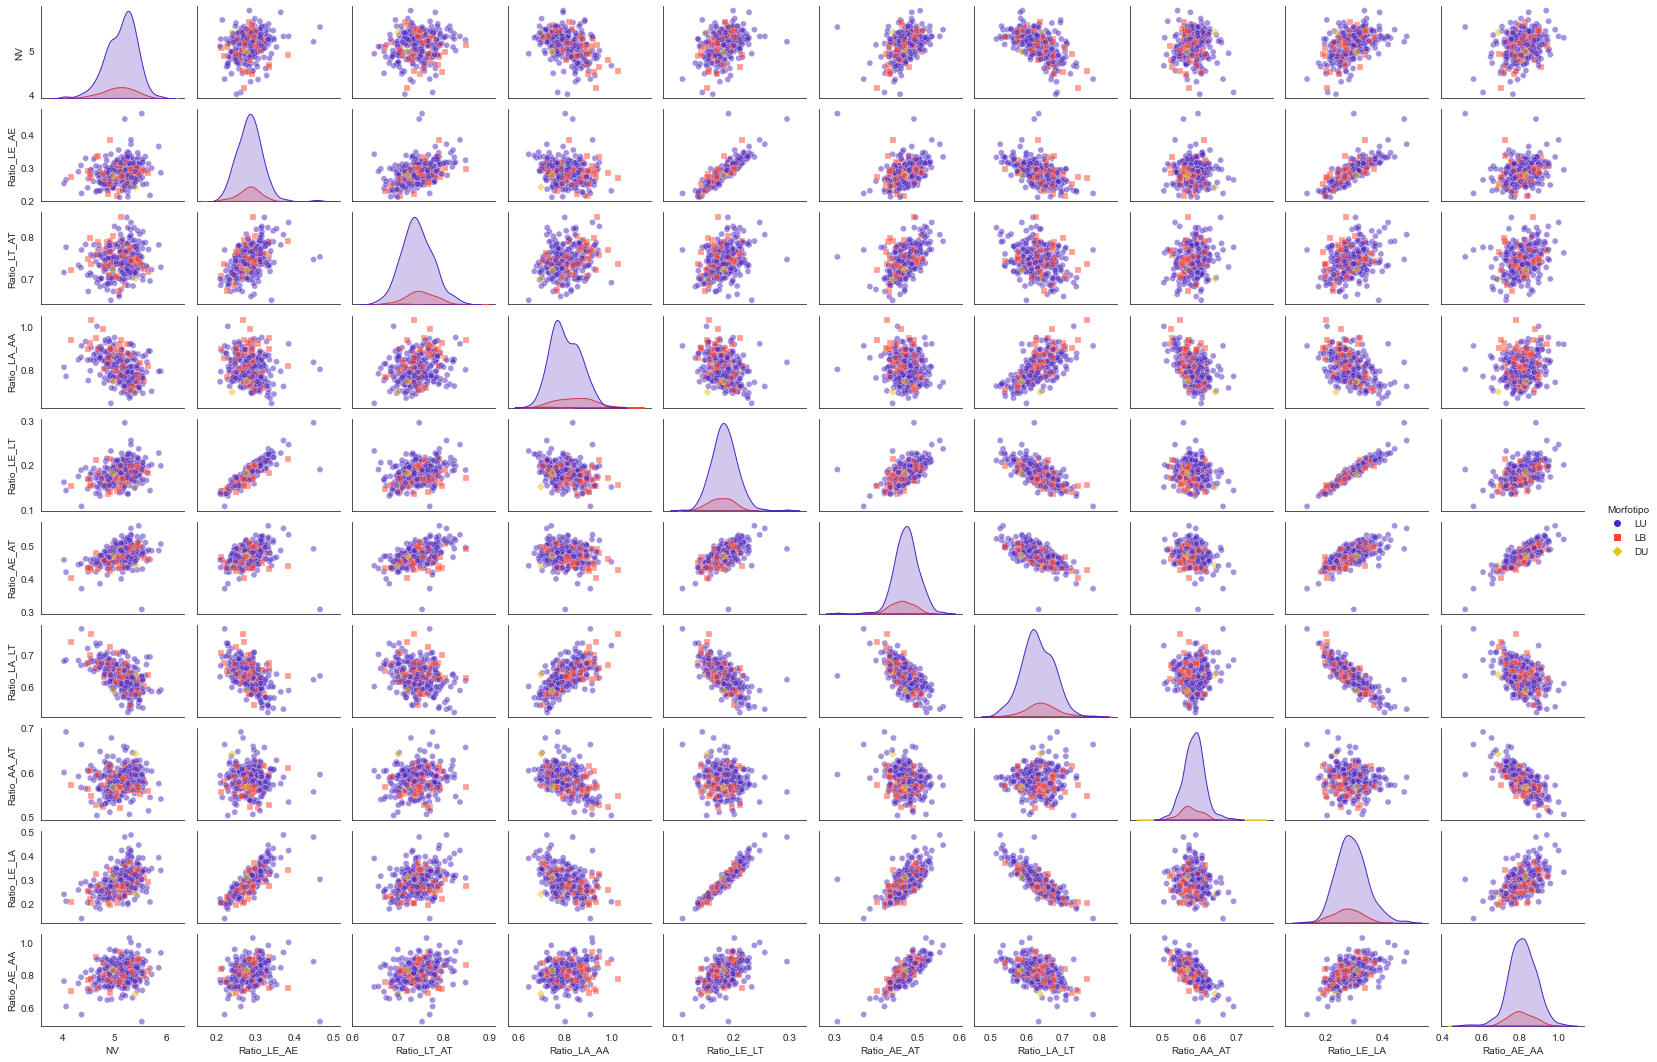

In [73]:
sns.pairplot(data=data,x_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
         y_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
             hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

In [74]:
# Guía de Colores Pairplot: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

## Exportación dataset listo

In [78]:
data.to_csv(r'../data/conchillas_listo.csv', index = False, header=True)